In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import pickle

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, auc
)

In [2]:
df=pd.read_csv("C:/Users/varsh/Downloads/customer_churn.csv")

In [6]:
df.head()

,monthly_charges,tenure_months,support_calls,contract_type,churn
0,73,49,2,1,0
1,84,29,9,1,0
2,70,53,2,2,0
3,72,44,7,1,0
4,55,57,7,2,0


In [7]:
df.columns

Index(['monthly_charges', 'tenure_months', 'support_calls', 'contract_type',
       'churn'],
      dtype='object')

In [8]:
df.isnull().sum()

monthly_charges    0
tenure_months      0
support_calls      0
contract_type      0
churn              0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [14]:
for i in ["monthly_charges","tenure_months","support_calls","contract_type"]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    lower= Q1 - 1.5 * IQR
    upper= Q3 + 1.5 * IQR

    outlier= (df[i] < lower) | (df[i] > upper)
    outlier_count = outlier.sum()
    print(f"Outliers in {i}: {outlier_count}")

Outliers in monthly_charges: 0
Outliers in tenure_months: 0
Outliers in support_calls: 0
Outliers in contract_type: 0


In [16]:
print(df[["monthly_charges","tenure_months","support_calls","contract_type"]].describe())



       monthly_charges  tenure_months  support_calls  contract_type
count       150.000000     150.000000     150.000000     150.000000
mean         68.706667      30.760000       4.286667       1.546667
std          29.197211      18.448433       2.876278       0.499485
min          20.000000       1.000000       0.000000       1.000000
25%          44.000000      13.000000       2.000000       1.000000
50%          64.500000      31.000000       4.000000       2.000000
75%          92.750000      47.750000       7.000000       2.000000
max         118.000000      59.000000       9.000000       2.000000


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["monthly_charges","tenure_months","support_calls","contract_type"]] = scaler.fit_transform(df[["monthly_charges","tenure_months","support_calls","contract_type"]])

In [19]:
print(df[["monthly_charges","tenure_months","support_calls","contract_type"]].describe())



       monthly_charges  tenure_months  support_calls  contract_type
count       150.000000     150.000000     150.000000     150.000000
mean          0.497007       0.513103       0.476296       0.546667
std           0.297931       0.318076       0.319586       0.499485
min           0.000000       0.000000       0.000000       0.000000
25%           0.244898       0.206897       0.222222       0.000000
50%           0.454082       0.517241       0.444444       1.000000
75%           0.742347       0.806034       0.777778       1.000000
max           1.000000       1.000000       1.000000       1.000000


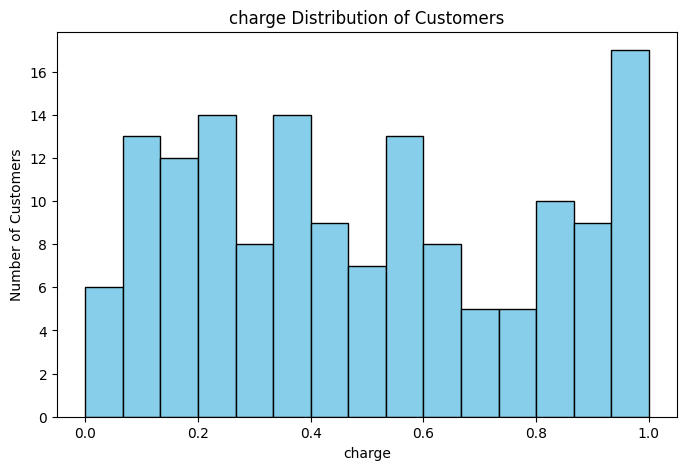

In [20]:
plt.figure(figsize=(8,5))
plt.hist(df['monthly_charges'], bins=15, color='skyblue', edgecolor='black')
plt.title("charge Distribution of Customers")
plt.xlabel("charge")
plt.ylabel("Number of Customers")
plt.show()

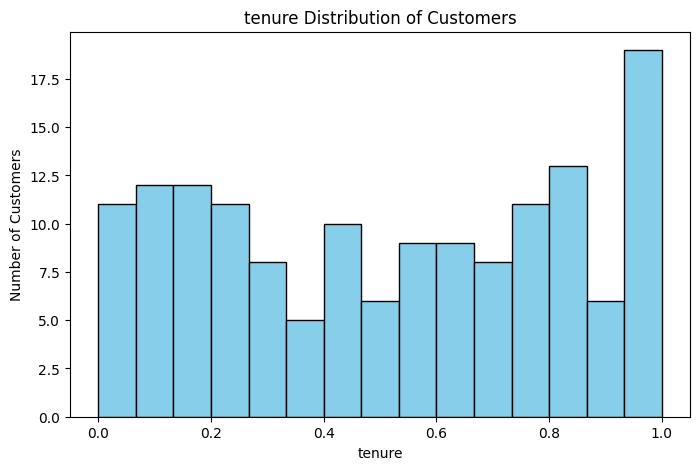

In [21]:
plt.figure(figsize=(8,5))
plt.hist(df['tenure_months'], bins=15, color='skyblue', edgecolor='black')
plt.title("tenure Distribution of Customers")
plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.show()

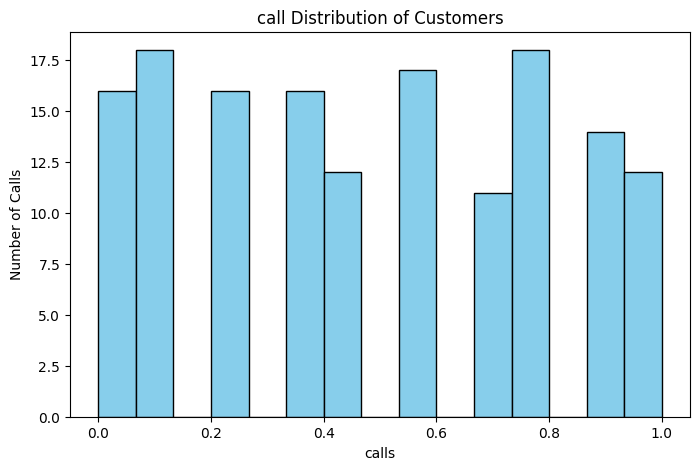

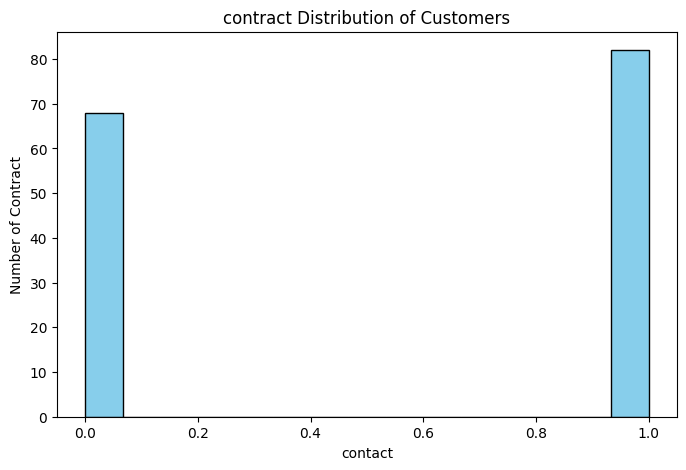

In [38]:
plt.figure(figsize=(8,5))
plt.hist(df['support_calls'], bins=15, color='skyblue', edgecolor='black')
plt.title("call Distribution of Customers")
plt.xlabel("calls")
plt.ylabel("Number of Calls")

plt.figure(figsize=(8,5))
plt.hist(df['contract_type'], bins=15, color='skyblue', edgecolor='black')
plt.title("contract Distribution of Customers")
plt.xlabel("contact")
plt.ylabel("Number of Contract")
plt.show()

In [25]:
X = df[["monthly_charges", "tenure_months", "support_calls", "contract_type"]]
y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


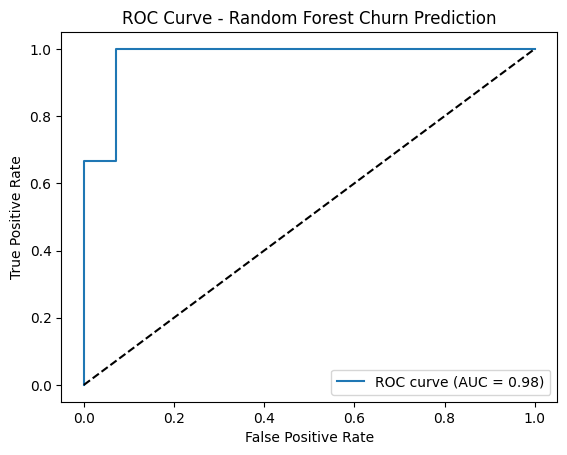

In [51]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test) 
y_pred_prob = rf.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--") 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Churn Prediction")
plt.legend(loc="lower right")
plt.show()

In [68]:
new_customer = np.array([[93, 4, 8, 2]]) 
prediction = rf.predict(new_customer)
pred_prob = rf.predict_proba(new_customer)[:, 1]

print("\nNew Customer Prediction (0=No Churn, 1=Churn):", prediction[0])
print("Churn Probability:", pred_prob[0])


New Customer Prediction (0=No Churn, 1=Churn): 0
Churn Probability: 0.14


In [69]:
print("Classification Report:\n", classification_report(y_test,y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.33      0.50         3

    accuracy                           0.96        45
   macro avg       0.98      0.67      0.74        45
weighted avg       0.96      0.96      0.94        45



In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9555555555555556
Precision: 1.0
Recall: 0.3333333333333333
F1 Score: 0.5
ROC-AUC Score: 0.9761904761904762

Confusion Matrix:
 [[42  0]
 [ 2  1]]


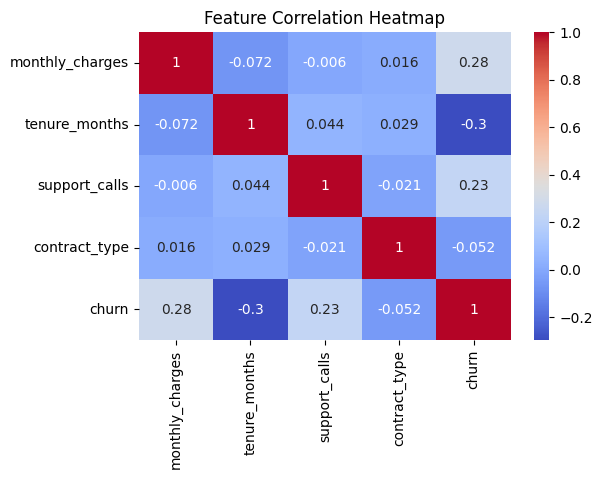

In [56]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

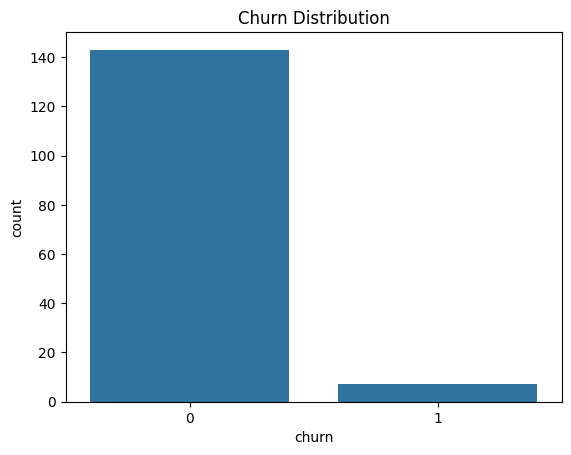

In [59]:
sns.countplot(x="churn",data=df)
plt.title("Churn Distribution")
plt.show()

In [66]:
with open("model.pkl", "wb") as file:
    pickle.dump((scaler, rf), file)  